## Example of an artificial neural network in classifying an image of a raccoon.
#### Author: Ithallo J. A. Guimarães    Aug/2016

In [2]:
from sklearn.neural_network import MLPClassifier
from scipy import misc # must be installed in order to read the images
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import pickle

In [3]:
#loading images
y1 = misc.imread('./set/r1.png')
y2 = misc.imread('./set/r2.png')
y3 = misc.imread('./set/r3.png')
y4 = misc.imread('./set/r4.png')
n1 = misc.imread('./set/not1.png')
n2 = misc.imread('./set/not2.png')
me = misc.imread('./set/dog.png')
y5 = misc.imread('./set/r5.png')
y6 = misc.imread('./set/r6.png')
raw_inputs = [np.array(y1[:,:,0]), np.array(y2[:,:,0]), np.array(y3[:,:,0]),
              np.array(y4[:,:,0]), np.array(n1[:,:,0]), np.array(n2[:,:,0]),
              np.array(me[:,:,0]), np.array(y5[:,:,0]), np.array(y6[:,:,0])]
for i in raw_inputs:
    print i.shape

(1080, 1280)
(350, 640)
(394, 500)
(183, 275)
(233, 350)
(183, 275)
(342, 351)
(650, 575)
(425, 600)


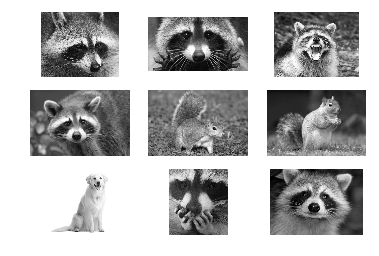

In [4]:
%matplotlib inline
n = 331
for i in raw_inputs:
    plt.subplot(n)
    plt.imshow(i, cmap=plt.cm.gray)
    plt.axis('off')
    n=n+1
plt.show()
   

In [5]:
def new_img(photo, r=150, c=150):
    new = []
    otp = []
    rows = np.linspace(0,photo.shape[0],r).astype(int)
    columns = np.linspace(0,photo.shape[1], c).astype(int)
    for  i in rows-1:
        for j in columns-1:
            new.append(photo[i,j])
        otp.append([new]) 
        new = []
    return np.hstack(otp) 
#reducing images to only 150x150 pixels
X =[]
for i in raw_inputs:
    X.append(new_img(i))
X= np.vstack(X)
print X.shape

(9, 22500)


In [6]:
y = [1., 1., 1., 1., 0., 0., 0., 1., 1.]

In [8]:
#load from file or run, run is for when you already have a model finished
ans = 'load'

if ans == 'run':
    #yes, a lot of layers
    clf = MLPClassifier(algorithm='l-bfgs', alpha=0.1, hidden_layer_sizes=(500,300,), random_state=1,
                    verbose=False, max_iter=10000, shuffle= False)
    clf.fit(X, y)
else:
    #Load it from here, and use it back
    f = open('raccoon.ann', 'r')
    nw = f.read()
    clf = pickle.loads(nw)
    print"Loaded from file"
f.close()

Loaded from file


In [9]:
results = clf.predict(X)
for i in results:
    if i== 1:
        print"It's a raccoon!"
    else:
        print"It's not a raccoon :I"
print"Accuracy:", clf.score(X, y) 

It's a raccoon!
It's a raccoon!
It's a raccoon!
It's a raccoon!
It's not a raccoon :I
It's not a raccoon :I
It's not a raccoon :I
It's a raccoon!
It's a raccoon!
Accuracy: 1.0


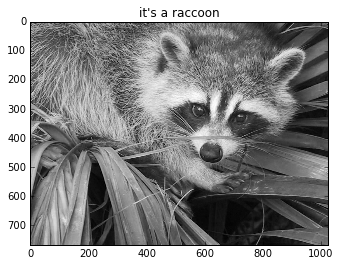

In [10]:

w1 =  misc.imread('./set/face.png')[:,:,0]
plt.imshow(w1, cmap=plt.cm.gray)
if clf.predict(new_img(w1))== 1: plt.title("it's a raccoon")
else: plt.title(" It's not a raccoon")

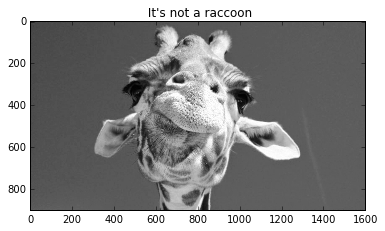

In [11]:
plt.imshow(misc.imread('./set/giraffe.png')[:,:,0], cmap=plt.cm.gray)    
if clf.predict(new_img(misc.imread('./set/giraffe.png')[:,:,0]))== 1: plt.title("it's a raccoon :P")
else: plt.title(" It's not a raccoon")

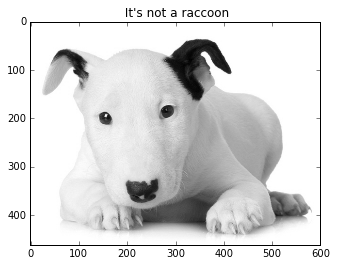

In [12]:
plt.imshow(misc.imread('./set/bt.png')[:,:,0], cmap=plt.cm.gray)
if clf.predict(new_img(misc.imread('./set/bt.png')[:,:,0]))== 1: plt.title("it's a raccoon :P")
else: plt.title(" It's not a raccoon")
    

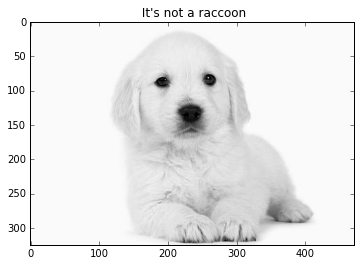

In [13]:
plt.imshow(misc.imread('./set/dog1.png')[:,:,0], cmap=plt.cm.gray)
if clf.predict(new_img(misc.imread('./set/dog1.png')[:,:,0]))== 1: plt.title("it's a raccoon :P")
else: plt.title(" It's not a raccoon")

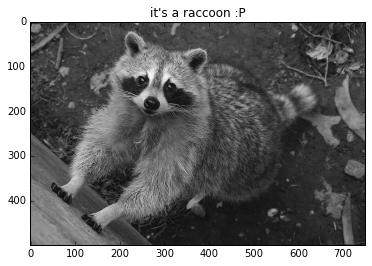

In [14]:
plt.imshow(misc.imread('./set/r7.png')[:,:,0], cmap=plt.cm.gray)
if clf.predict(new_img(misc.imread('./set/r7.png')[:,:,0]))== 1: plt.title("it's a raccoon :P")
else: plt.title(" It's not a raccoon")

In [ ]:
#Save ANN to file
ans="no"
if ans == 'save':    
    f = open("raccoo
             n.ann", "w")
    f.write(pickle.dumps(clf))
    f.close()
    print'saved'
else: print'Nothing to save'